<a href="https://colab.research.google.com/github/Radityaz/2025_AI_TI1B/blob/main/RikoAdityaZaki_AI_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJIAN TENGAH SEMESTER KECERDASAN BUATAN

## IMPORT LIBRARY

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## DATASET INFORMATION

In [11]:
df = pd.read_csv('airbnb.csv')
display(df.head())
print(f"\nShape Dataset: {df.shape}")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



Shape Dataset: (48895, 16)


## TABLE STATISCTICS

Statistik deskriptif untuk kolom numerik

In [12]:
print("Statistik Deskriptif Kolom Numerik:")
display(df.describe())

Statistik Deskriptif Kolom Numerik:


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Statistik deskriptif untuk kolom kategorikal

In [13]:
print("Statistik Deskriptif Kolom Kategorikal:")
display(df.describe(include=['object']))

Statistik Deskriptif Kolom Kategorikal:


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Hitung missing values per kolom

In [14]:
missing_values = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})

# Filter hanya yang memiliki missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage (%)', ascending=False)

print("Missing Values per Kolom:")
display(missing_data)

Missing Values per Kolom:


,Missing Values,Percentage (%)
reviews_per_month,10052,20.558339
last_review,10052,20.558339
host_name,21,0.042949
name,16,0.032723


## DATA CLEANING

Menangani Data Missing

In [15]:
# 1. Pertama, periksa hubungan antara missing values di kedua kolom
print("Sebelum cleaning:")
print(f"Jumlah missing di reviews_per_month: {df['reviews_per_month'].isnull().sum()}")
print(f"Jumlah missing di last_review: {df['last_review'].isnull().sum()}")

# 2. Handle missing values dengan lebih tepat
# Untuk properti tanpa review, lebih baik gunakan pendekatan berikut:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna('No Review')  # atau bisa diisi dengan tanggal tertentu

# 3. Tambahkan kolom flag untuk menandai properti tanpa review
df['has_review'] = df['number_of_reviews'] > 0

# 4. Verifikasi
print("\nSetelah cleaning:")
print(f"Jumlah missing di reviews_per_month: {df['reviews_per_month'].isnull().sum()}")
print(f"Jumlah missing di last_review: {df['last_review'].isnull().sum()}")

Sebelum cleaning:
Jumlah missing di reviews_per_month: 10052
Jumlah missing di last_review: 10052

Setelah cleaning:
Jumlah missing di reviews_per_month: 0
Jumlah missing di last_review: 0


Menangani Outliner

In [16]:
df_clean = df[(df['price'] > 0) & (df['price'] <= 1000)].copy()

# Hapus properti dengan minimum_nights > 365
df_clean = df_clean[df_clean['minimum_nights'] <= 365]

print(f"Shape sebelum cleaning: {df.shape}")
print(f"Shape setelah cleaning: {df_clean.shape}")

Shape sebelum cleaning: (48895, 17)
Shape setelah cleaning: (48631, 17)


## DATA CHARTS

Analisis Kolom Kategorikal

In [17]:
def plot_categorical_distribution(column, title, rotation=0):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=rotation)

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.01 * total
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()

Distribusi neighbourhood_group

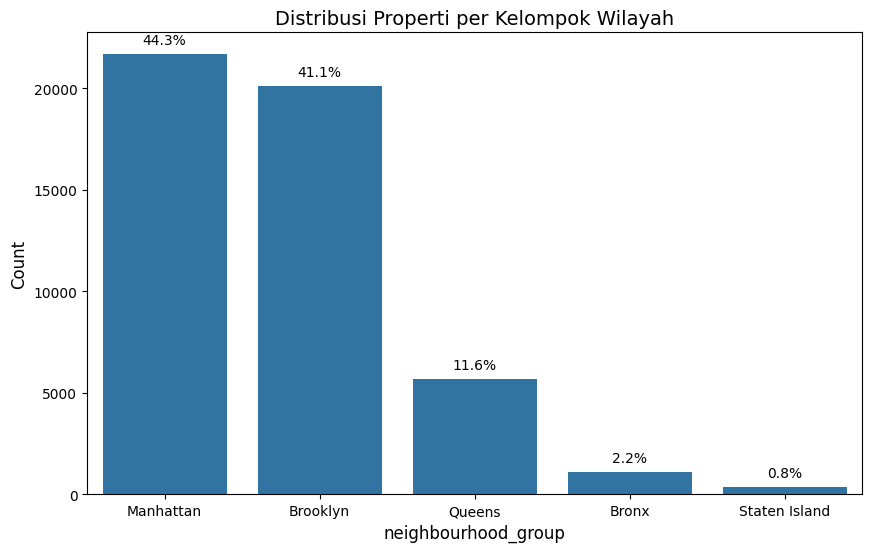

In [18]:
plot_categorical_distribution('neighbourhood_group', 'Distribusi Properti per Kelompok Wilayah')

Distribusi room_type

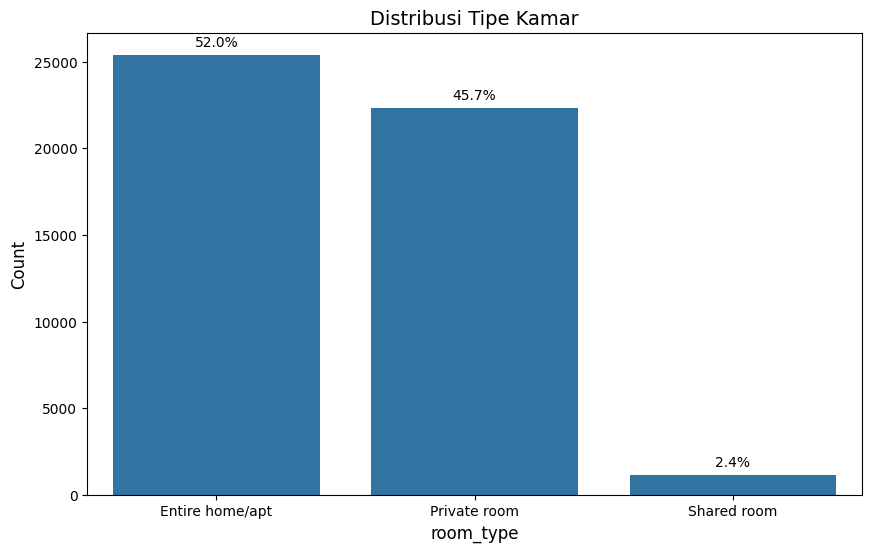

In [19]:
plot_categorical_distribution('room_type', 'Distribusi Tipe Kamar')

Top 10 neighbourhood

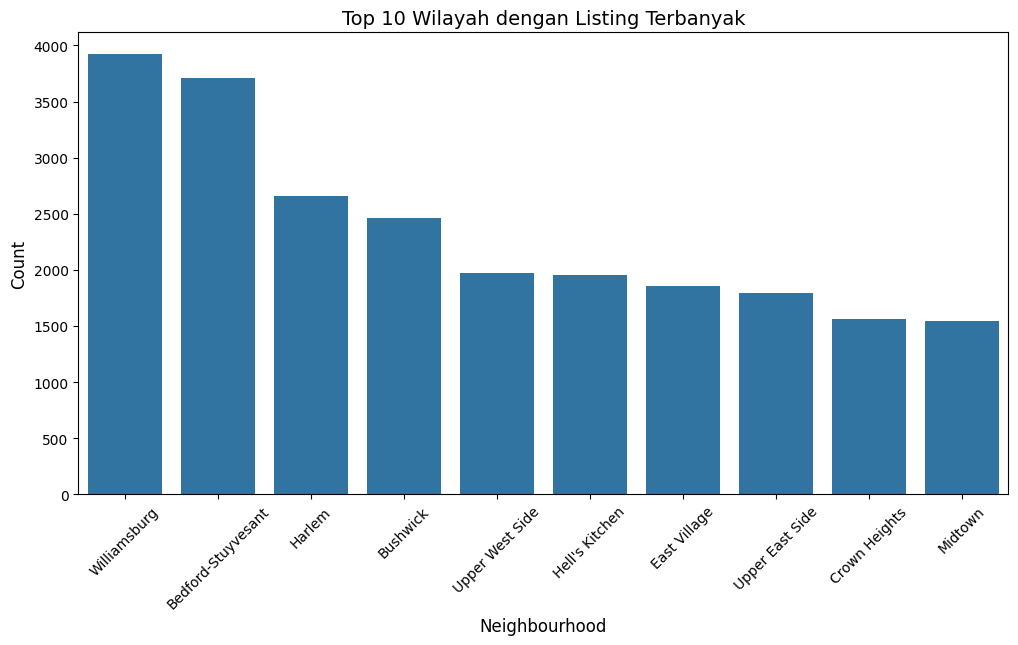

In [20]:
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values)
plt.title('Top 10 Wilayah dengan Listing Terbanyak', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Analisis Kolom Numerik

In [26]:
def plot_numerical_distribution(column, title, bins=30, log_scale=False):
    plt.figure(figsize=(12, 6))

    # Histogram
    sns.histplot(data=df, x=column, bins=bins, kde=True)

    if log_scale:
        plt.xscale('log')
        title += ' (Log Scale)'

    plt.title(f'Distribusi {title}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()



Distribusi availability_365

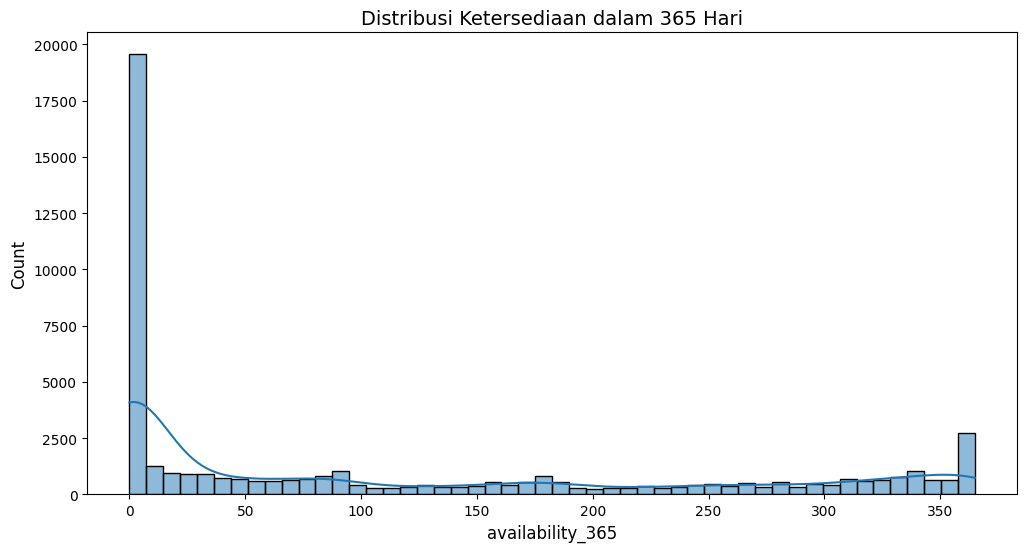

In [25]:
plot_numerical_distribution('availability_365', 'Ketersediaan dalam 365 Hari', bins=50)

Distribusi Number of Review

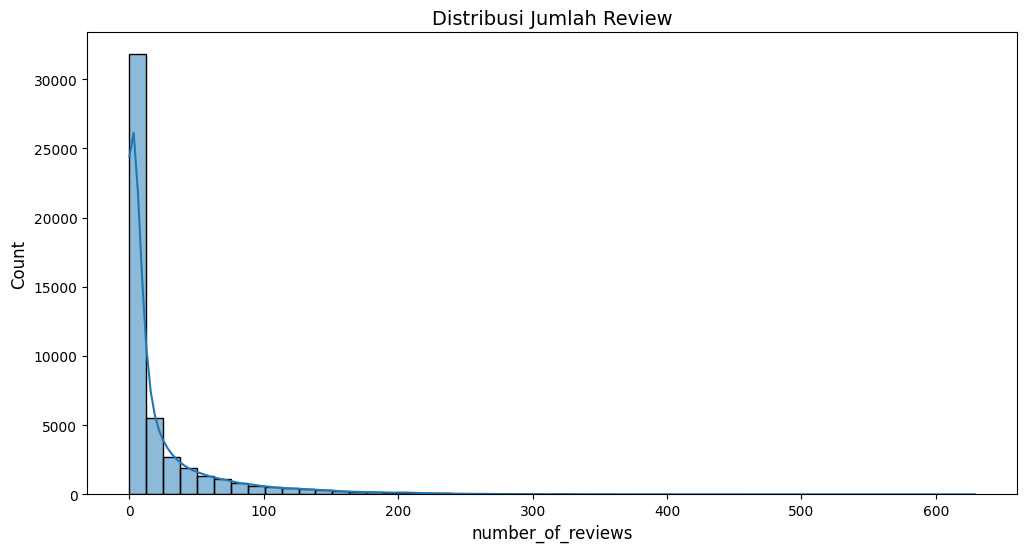

In [23]:
plot_numerical_distribution('number_of_reviews', 'Jumlah Review', bins=50)

Distribusi Minimum Nights

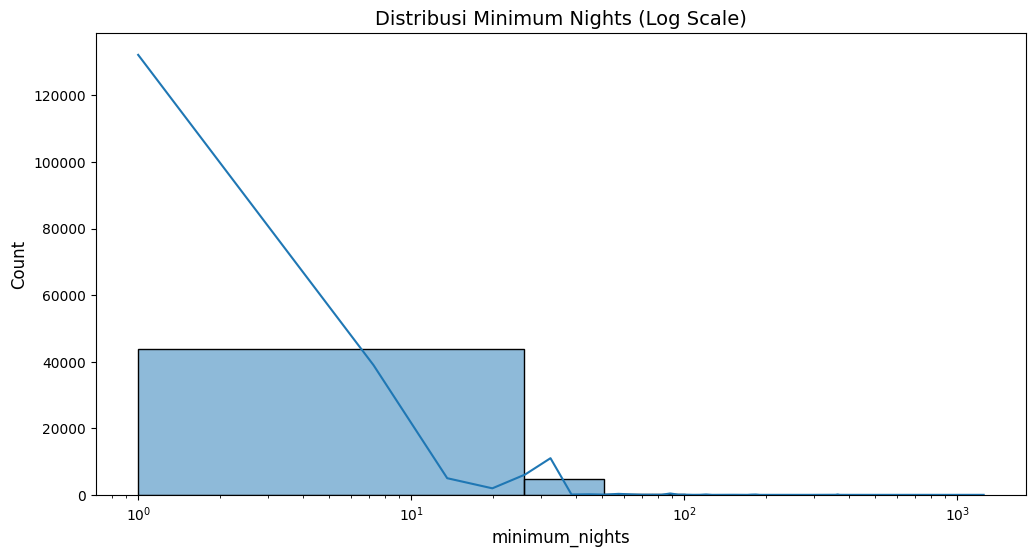

In [22]:
plot_numerical_distribution('minimum_nights', 'Minimum Nights', bins=50, log_scale=True)

Distribusi Harga

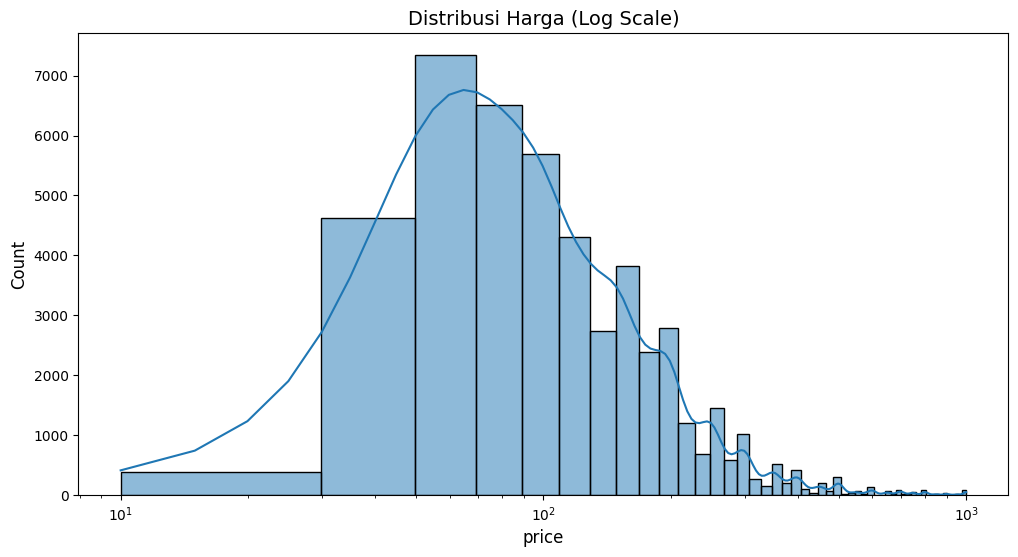

In [42]:
plot_numerical_distribution('price', 'Harga', bins=50, log_scale=True)

Analisis Harga

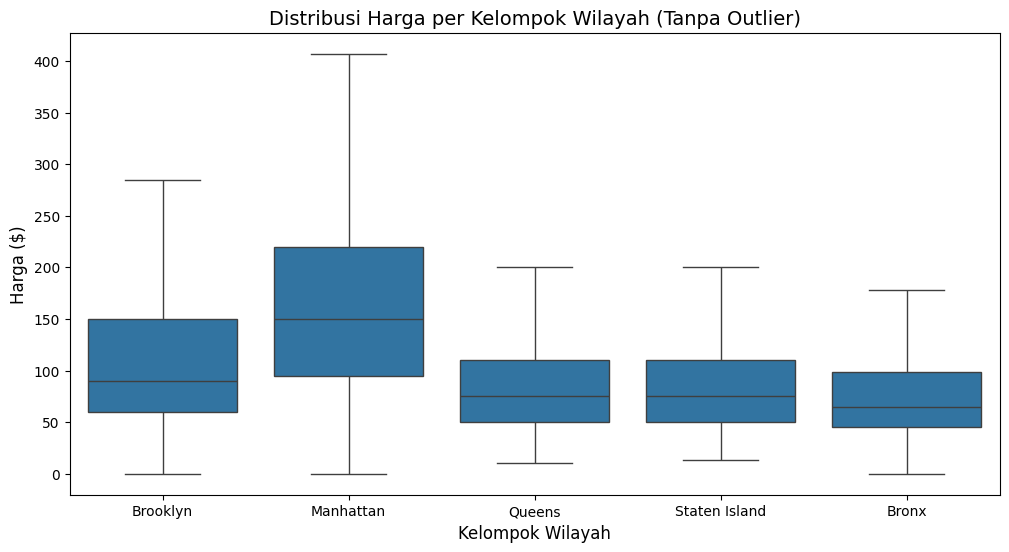

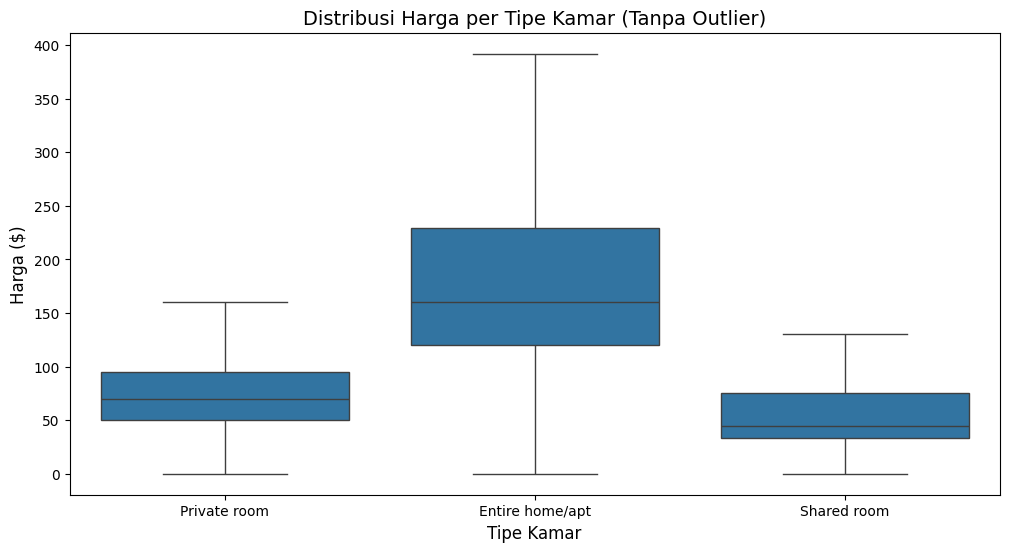

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', showfliers=False)
plt.title('Distribusi Harga per Kelompok Wilayah (Tanpa Outlier)', fontsize=14)
plt.xlabel('Kelompok Wilayah', fontsize=12)
plt.ylabel('Harga ($)', fontsize=12)
plt.show()

# %%
# Harga berdasarkan room_type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='room_type', y='price', showfliers=False)
plt.title('Distribusi Harga per Tipe Kamar (Tanpa Outlier)', fontsize=14)
plt.xlabel('Tipe Kamar', fontsize=12)
plt.ylabel('Harga ($)', fontsize=12)
plt.show()

10 Properti Termahal

In [28]:
top_expensive = df.sort_values('price', ascending=False).head(10)[['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
print("10 Properti Termahal:")
display(top_expensive)

10 Properti Termahal:


,name,neighbourhood_group,neighbourhood,room_type,price
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Entire home/apt,10000
9151,Furnished room in Astoria apartment,Queens,Astoria,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Entire home/apt,10000
6530,Spanish Harlem Apt,Manhattan,East Harlem,Entire home/apt,9999
40433,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Private room,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,Entire home/apt,8500
4377,Film Location,Brooklyn,Clinton Hill,Entire home/apt,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,Entire home/apt,7703
42523,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,Entire home/apt,7500


Analisis Geografis

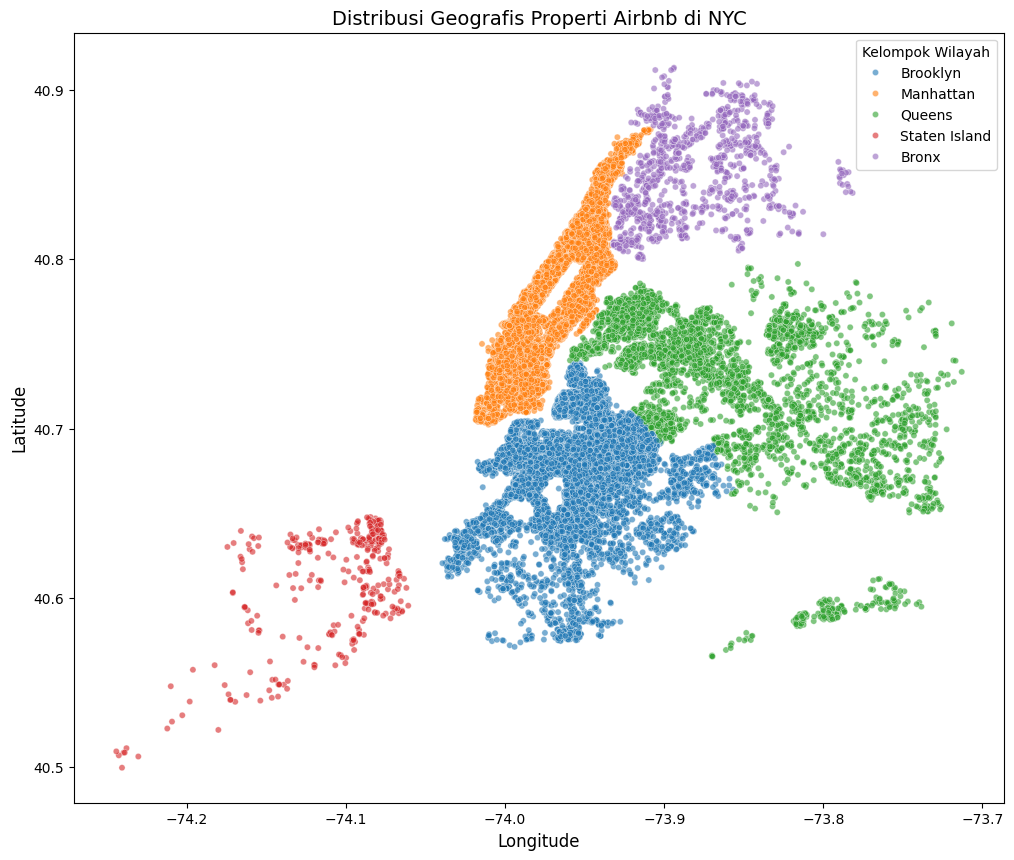

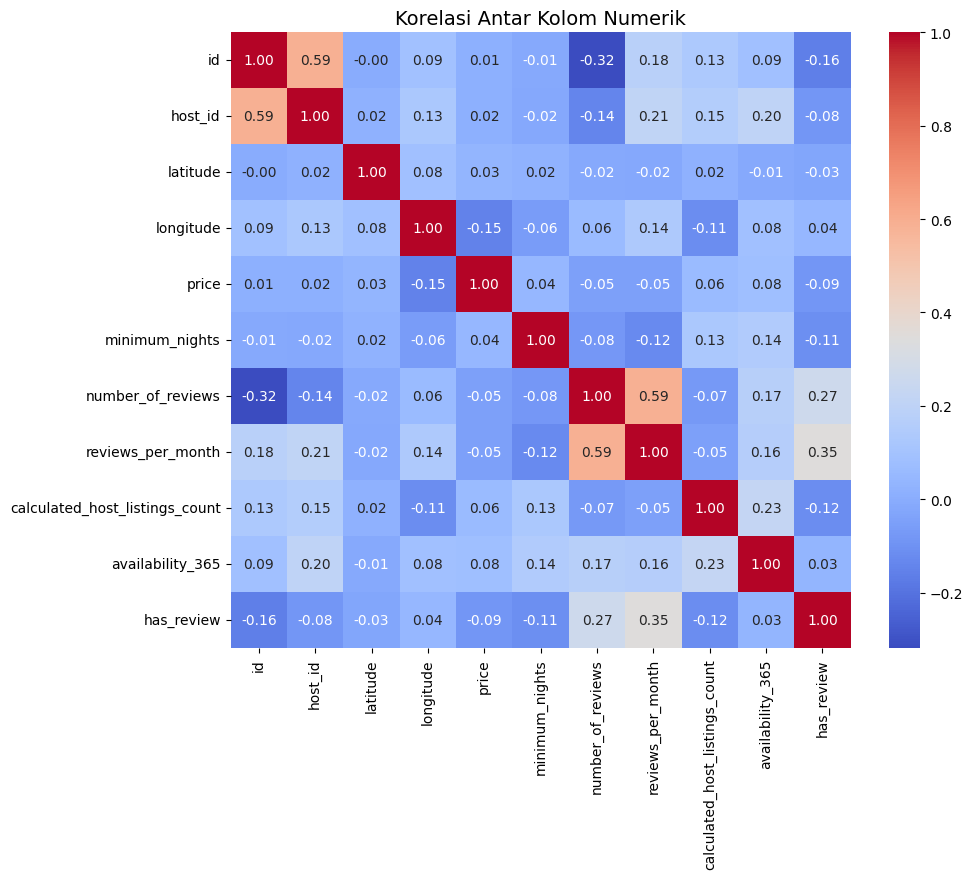

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.6, s=20)
plt.title('Distribusi Geografis Properti Airbnb di NYC', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Kelompok Wilayah')
plt.show()

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Kolom Numerik', fontsize=14)
plt.show()


Analisis Host

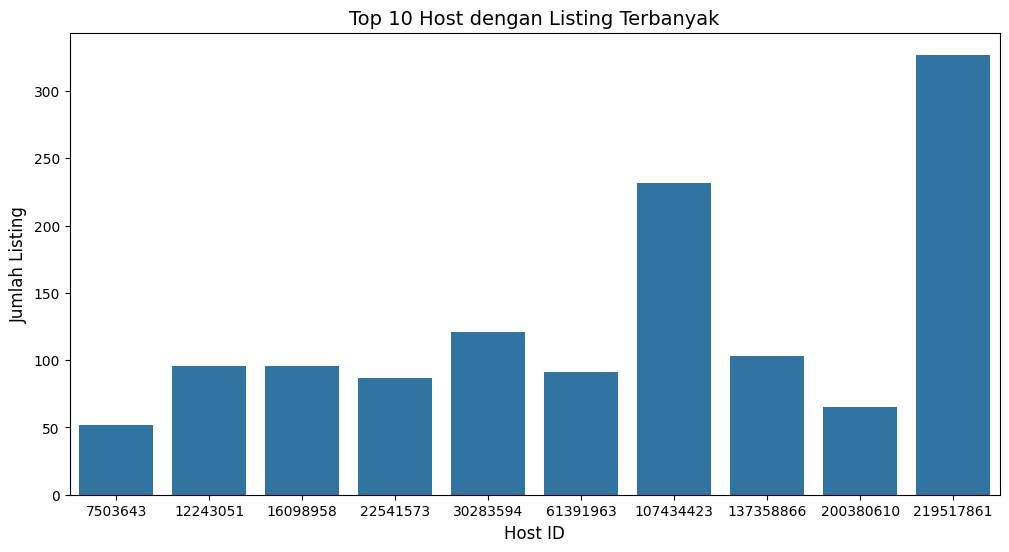

,host_id,host_name,calculated_host_listings_count
38293,219517861,Sonder (NYC),327
26137,107434423,Blueground,232
9740,30283594,Kara,121
32718,137358866,Kazuya,103
30637,12243051,Sonder,96
5093,16098958,Jeremy & Laura,96
14682,61391963,Corporate Housing,91
15865,22541573,Ken,87
34010,200380610,Pranjal,65
2631,7503643,Vida,52


In [29]:
top_hosts = df['host_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values)
plt.title('Top 10 Host dengan Listing Terbanyak', fontsize=14)
plt.xlabel('Host ID', fontsize=12)
plt.ylabel('Jumlah Listing', fontsize=12)
plt.show()

top_hosts_details = df[df['host_id'].isin(top_hosts.index)][['host_id', 'host_name', 'calculated_host_listings_count']].drop_duplicates()
display(top_hosts_details.sort_values('calculated_host_listings_count', ascending=False))